In [1]:
ENV["Code"] = "../../Code"

for ii in readdir(ENV["Code"])
push!(LOAD_PATH, string(ENV["Code"],"/", ii));
end

include("../Code/HiddenCode_BSBF.jl")
include("../Code/meanmRNAcounts_BSBF.jl")
include("../Code/Functions.jl")
include("../Code/CalculateBF.jl")

CSV.write("../SourceData/Fig4d.csv",BFs)

"../SourceData/Fig4d.csv"

┌ Warning: RCall.jl: Loading required package: grid
└ @ RCall /Users/irr15/.julia/packages/RCall/iMDW2/src/io.jl:160
┌ Warning: RCall.jl: 
│ Attaching package: ‘DescTools’
│ 
│ The following objects are masked from ‘package:psych’:
│ 
│     AUC, ICC, SD
│ 
└ @ RCall /Users/irr15/.julia/packages/RCall/iMDW2/src/io.jl:160
┌ Warning: RCall.jl: 
│ Attaching package: ‘rcompanion’
│ 
│ The following object is masked from ‘package:psych’:
│ 
│     phi
│ 
└ @ RCall /Users/irr15/.julia/packages/RCall/iMDW2/src/io.jl:160
┌ Warning: RCall.jl: 
│ Attaching package: ‘dplyr’
│ 
│ The following objects are masked from ‘package:stats’:
│ 
│     filter, lag
│ 
│ The following objects are masked from ‘package:base’:
│ 
│     intersect, setdiff, setequal, union
│ 
└ @ RCall /Users/irr15/.julia/packages/RCall/iMDW2/src/io.jl:160


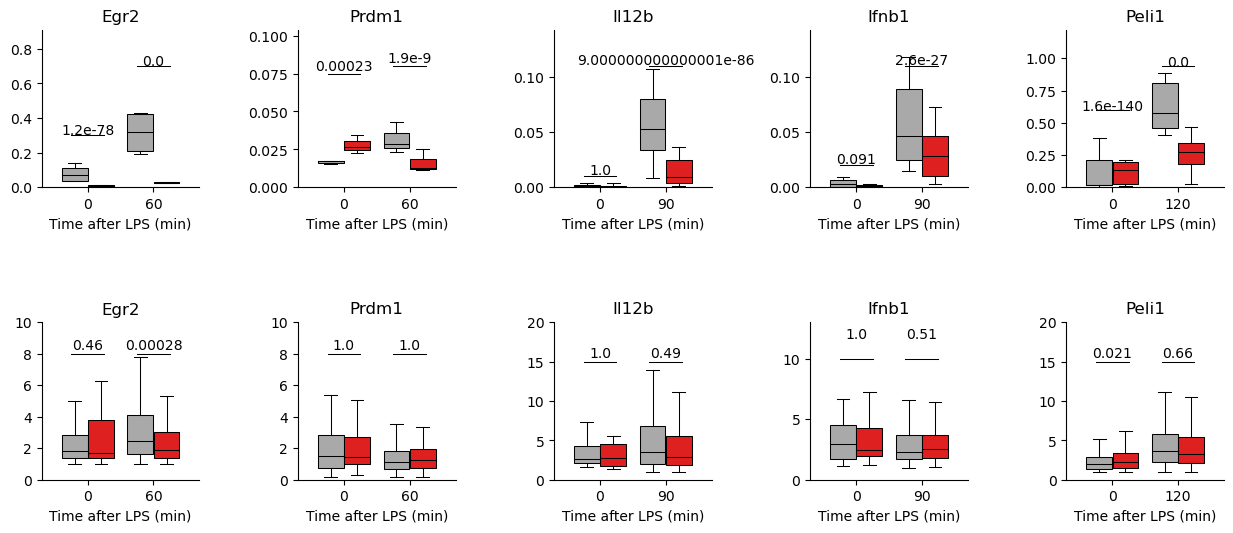

In [2]:
r= 2
c = 6
figure(figsize = (15, 6))

f = plot_bf

subplot(r, c, 1)

gene = "Egr2"
f(gene, scale = "min")
genefreq = BFs[BFs[!,:Gene].==gene, :]

tests = [do_mantelhaen(genefreq, "WT_0", "Rad21KO_0"),
    do_mantelhaen(genefreq, "WT_60", "Rad21KO_60")]

add_tests3(tests, [0.3, 0.7], u = 0.03)

subplot(r, c, 2)

gene = "Prdm1"
f(gene, scale = "min")
genefreq = BFs[BFs[!,:Gene].==gene, :]
ylim(0, 0.1)
tests = [do_mantelhaen(genefreq, "WT_0", "Rad21KO_0"),
    do_mantelhaen(genefreq, "WT_60", "Rad21KO_60")]

add_tests3(tests, [0.075, 0.08], u =  0.005)


subplot(r, c, 3)

gene = "Il12b"
f(gene, scale = "min")
genefreq = BFs[BFs[!,:Gene].==gene, :]

tests = [do_mantelhaen(genefreq, "WT_0", "Rad21KO_0"),
    do_mantelhaen(genefreq, "WT_90", "Rad21KO_90")]
ylim(0, 0.14)
add_tests3(tests, [0.01, 0.11], u = 0.005)

plt.tight_layout()


subplot(r, c, 4)

gene = "Ifnb1"
f(gene, scale = "min")
genefreq = BFs[BFs[!,:Gene].==gene, :]

tests = [do_mantelhaen(genefreq, "WT_0", "Rad21KO_0"),
    do_mantelhaen(genefreq, "WT_90", "Rad21KO_90")]
ylim(0, 0.14)
add_tests3(tests, [0.02, 0.11], u =  0.005)


plt.tight_layout()


subplot(r, c, 5)

gene = "Peli1"
f(gene, scale = "min")
genefreq = BFs[BFs[!,:Gene].==gene, :]

tests = [do_mantelhaen(genefreq, "WT_0", "Rad21KO_0"),
    do_mantelhaen(genefreq, "WT_120", "Rad21KO_120")]
ylim(0, 1)
add_tests3(tests, [0.6, 0.94], u = 0.03)

plt.tight_layout()


f = plot_bs

subplot(r, c, 7)
gene = "Egr2"
a = f(gene,1, 0, 60, maxy = 10, scale = "min")
tests = add_tests_bs(a, ["WT_0-Rad21KO_0", "WT_60-Rad21KO_60"])
add_tests4(tests, [8, 8], u = 0.5)


subplot(r, c, 8)
gene = "Prdm1"
a = f(gene,0, 0, 60, maxy = 10, scale = "min")
tests = add_tests_bs(a, ["WT_0-Rad21KO_0", "WT_60-Rad21KO_60"])
add_tests4(tests, [8, 8], u = 0.5)


subplot(r, c, 9)
gene = "Il12b"
a = f(gene,1, 0, 90, maxy = 20, scale = "min")
tests = add_tests_bs(a, ["WT_0-Rad21KO_0", "WT_90-Rad21KO_90"])
add_tests4(tests, [15, 15], u = 1)

subplot(r, c, 10)
gene = "Ifnb1"
a = f(gene,1, 0, 90, maxy = 13, scale = "min")
tests = add_tests_bs(a, ["WT_0-Rad21KO_0", "WT_90-Rad21KO_90"])
add_tests4(tests, [10, 10], u = 2)


subplot(r, c, 11)
gene = "Peli1"
a = f(gene,1, 0, 120, maxy = 20, scale = "min")
tests = add_tests_bs(a, ["WT_0-Rad21KO_0", "WT_120-Rad21KO_120"])
add_tests4(tests, [15, 15], u = 1)

plt.tight_layout()

savefigwithtext("BSBFInducibleGenes_WTRad21KO.svg")

In [3]:
import Pkg; Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [7e6ae17a] BioSequences v2.0.5
  [336ed68f] CSV v0.9.11
  [8f4d0f93] Conda v1.5.2
  [a93c6f00] DataFrames v1.2.2
  [31c24e10] Distributions v0.25.28
  [c2308a5c] FASTX v1.2.0
  [09f84164] HypothesisTests v0.10.6
  [7073ff75] IJulia v1.23.2
  [916415d5] Images v0.24.1
  [96684042] InformationMeasures v0.3.1
  [10e44e05] MATLAB v0.8.2
  [f8716d33] MultipleTesting v0.5.0
  [92933f4c] ProgressMeter v1.7.1
  [438e738f] PyCall v1.92.5
  [d330b81b] PyPlot v2.10.0
  [6f49c342] RCall v0.13.12
  [d2ef9438] Seaborn v1.0.0
  [2913bbd2] StatsBase v0.33.13
